In [1]:
import tensorflow as tf

In [2]:
# Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant().
scalar = tf.constant(1, dtype=tf.float32)
vector = tf.constant([2, 3], dtype=tf.float32)
matrix = tf.constant([[3, 4],
                      [5, 6]], dtype=tf.float32)
tensor = tf.expand_dims(matrix, -1)

In [6]:
scalar.numpy(), vector.numpy(), matrix.numpy(), tensor.numpy()

(1.0, array([2., 3.], dtype=float32), array([[3., 4.],
        [5., 6.]], dtype=float32), array([[[3.],
         [4.]],
 
        [[5.],
         [6.]]], dtype=float32))

2

In [29]:
# Find the shape, rank and size of the tensors you created in 1.
for i, s in zip([scalar, vector, matrix, tensor], ['scalar', 'vector', 'matrix', 'tensor']):
  print(s, 'shape:', i.shape)
  print(s, 'rank:', i.ndim)
  print(s, 'size:', tf.size(i).numpy())
  print('\n')

scalar shape: ()
scalar rank: 0
scalar size: 1


vector shape: (2,)
vector rank: 1
vector size: 2


matrix shape: (2, 2)
matrix rank: 2
matrix size: 4


tensor shape: (2, 2, 1)
tensor rank: 3
tensor size: 4




In [31]:
# Create two tensors containing random values between 0 and 1 with shape [5, 300].
rand = tf.random.Generator.from_seed(42)
tns1 = rand.uniform(shape=(5, 300), minval=0, maxval=1, dtype=tf.float32)
tns2 = rand.uniform(shape=(5, 300), minval=0, maxval=1, dtype=tf.float32)

print('Tensor 1 shape:', tns1.shape)
print('Tensor 2 shape:', tns2.shape)

Tensor 1 shape: (5, 300)
Tensor 2 shape: (5, 300)


In [34]:
# Multiply the two tensors you created in 3 using matrix multiplication.
# Multiply the two tensors you created in 3 using dot product.

matmul = tf.matmul(tf.transpose(tns1), tns2)
at = tns1.numpy().T @ tns2
dot = tf.tensordot(tf.transpose(tns1), tns2, axes=1)
einsum = tf.einsum('ji, jk -> ik', tns1, tns2)

In [43]:
print('matmul equals at? \t', tf.math.reduce_any(matmul == at))
print('matmul equals dot? \t', tf.math.reduce_any(matmul == dot))
print('matmul equals einsum? \t', tf.math.reduce_any(matmul == einsum))

matmul equals at? 	 tf.Tensor(True, shape=(), dtype=bool)
matmul equals dot? 	 tf.Tensor(True, shape=(), dtype=bool)
matmul equals einsum? 	 tf.Tensor(True, shape=(), dtype=bool)


In [44]:
# Create a tensor with random values between 0 and 1 with shape [224, 224, 3].
img = tf.random.Generator.from_seed(42)
img = img.uniform(shape=(224, 224, 3), minval=0, maxval=1, dtype=tf.float32)

In [50]:
image_data.dtype

dtype('float32')

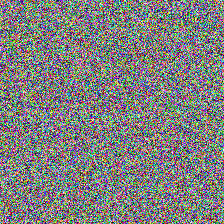

In [54]:
from PIL import Image
import numpy as np

image_data = tf.multiply(img, 255).numpy()
image = Image.fromarray(image_data.astype(np.uint8))
image

In [56]:
# Find the min and max values of the tensor you created in 6.
print('max value:', tf.reduce_max(img).numpy())
print('min value:', tf.reduce_min(img).numpy())

max value: 0.99998736
min value: 4.053116e-06


In [58]:
# Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3].
sqz = tf.random.Generator.from_seed(42)
sqz = sqz.normal(shape=(1, 224, 224, 3))
squeezed = tf.squeeze(sqz, axis=0)

print(sqz.shape, squeezed.shape)

(1, 224, 224, 3) (224, 224, 3)


In [69]:
# Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.
ohe = tf.random.Generator.from_seed(10)
ohe = ohe.uniform(shape=[10], minval=0, maxval=20, dtype=tf.int32)

In [70]:
ohe

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 6, 18,  2, 14, 14, 14, 11,  7,  0, 19], dtype=int32)>

In [71]:
tf.argmax(ohe).numpy()

9

In [72]:
print(ohe.numpy()[tf.argmax(ohe).numpy()])

19


In [ ]:
# One-hot encode the tensor you created in 9.

In [76]:
oh = tf.one_hot(ohe, depth=20)

In [77]:
categorized = tf.keras.utils.to_categorical(ohe, num_classes=20)

In [79]:
tf.reduce_any(oh == categorized).numpy()

True